In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE

# Part 1: Prepare the Data


In [3]:
# Load the data
file_path = Path("Resources/myopia.csv")
myopia_df = pd.read_csv(file_path)
myopia_df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [5]:
# Drop the null columns where all values are null
clean_data = myopia_df.isnull().sum()
clean_data


AGE          0
SPHEQ        0
AL           0
ACD          0
LT           0
VCD          0
SPORTHR      0
READHR       0
COMPHR       0
STUDYHR      0
TVHR         0
DIOPTERHR    0
MOMMY        0
DADMY        0
MYOPIC       0
dtype: int64

In [6]:
#Drop duplicate rows
duplicates = myopia_df.duplicated().sum()
duplicates

0

In [9]:
# Split the dataframe
X = myopia_df['MYOPIC']
y = myopia_df.drop('MYOPIC', axis=1)
y.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [11]:
# Create a scaler to standardise the data
scaler = StandardScaler()
# Fit and Transforme.
scaled_features =scaler.fit_transform(y)

# Part 2: Apply Dimensionality Reduction

In [12]:
# Initialise PCA model with 0.9 explained variance
pca = PCA(n_components=0.9)

# Get two principal components for the data.
myopic_pca = pca.fit_transform(scaled_features)

In [15]:
myopic_pca.shape

(618, 10)

In [16]:
# Fetch the explained variance
pca.explained_variance_ratio_.sum()

0.9187361702915187

The dimensionality is reduced from 14 to 10, which covers around 92% of the explained variance.

In [17]:
# Convert PCA data to a DataFrame
df_myopic_pca = pd.DataFrame(
    data=myopic_pca, columns=["pc 1", "pc 2", "pc 3", "pc 4", "pc 5", "pc 6", "pc 7", "pc 8", "pc 9", "pc 10"]
)
df_myopic_pca.head()

,pc 1,pc 2,pc 3,pc 4,pc 5,pc 6,pc 7,pc 8,pc 9,pc 10
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183


In [18]:
df_myopic_pca.to_csv('Resources/myopic_pca.csv')

# Visualize using t-SNE

In [19]:
tsne = TSNE(learning_rate=500.0, init = "pca", n_iter = 600, n_iter_without_progress = 250)
tsne_features = tsne.fit_transform(myopic_pca)

/Users/razvan/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


In [20]:
# Verify that dimensions have been reduced to 2
tsne_features.shape

(618, 2)

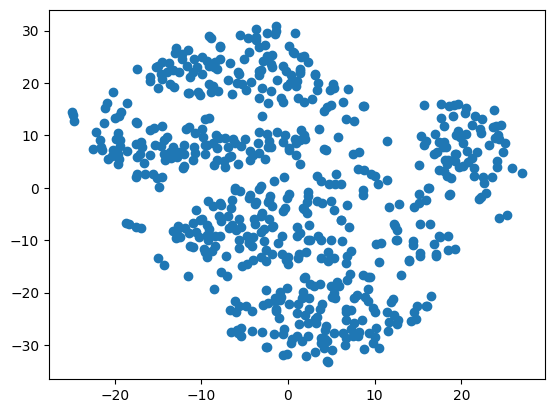

In [21]:
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

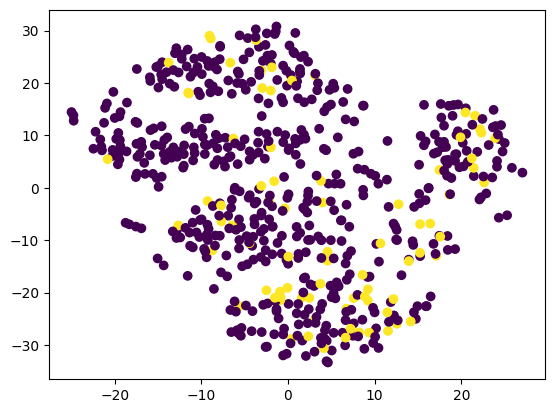

In [23]:
# Results coloured by target value (X)
plt.scatter(tsne_features[:,0], tsne_features[:,1], c=X)
plt.show()

# Part 3: Perform a Cluster Analysis with K-means

In [24]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    kmeans = KMeans(n_clusters=i, random_state=12)
    kmeans.fit(df_myopic_pca)
    inertia.append(kmeans.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,7948.905345
1,2,6794.293482
2,3,6030.318436
3,4,5662.663966
4,5,5416.061716


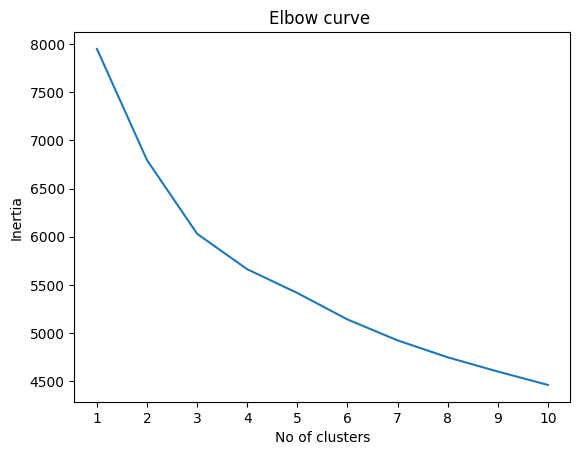

In [26]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('No of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve ')
plt.show()

From the graph, it can be concluded that the elbow is between the k values of 2 and 3.

In [27]:
#Function for KMeans
def get_clusters(k, data):
    # Initialise the K-Means model
    model = KMeans(n_clusters=k, random_state=12)

    # Train the model
    model.fit(data)

    # Predict clusters
    predict_ = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

In [31]:
clusters = get_clusters(3, df_myopic_pca)
clusters

,pc 1,pc 2,pc 3,pc 4,pc 5,pc 6,pc 7,pc 8,pc 9,pc 10,class
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144,1
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031,0
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336,1
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400,1
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183,0
...,...,...,...,...,...,...,...,...,...,...,...
613,-0.237547,1.146547,-1.546054,-0.248834,2.326683,-0.202403,0.084104,0.705501,-0.854993,0.736996,1
614,-0.649011,-1.796952,-0.823592,0.564878,0.134282,0.348639,-0.174354,0.252875,1.022202,-0.544105,0
615,-0.890082,-2.308005,0.268102,0.262770,0.231606,0.566061,-0.328287,-0.489877,1.822691,0.081777,0
616,-1.124000,0.451890,0.001659,-0.847089,-0.143347,-0.414353,-0.448120,0.239685,-1.592822,-1.014581,1


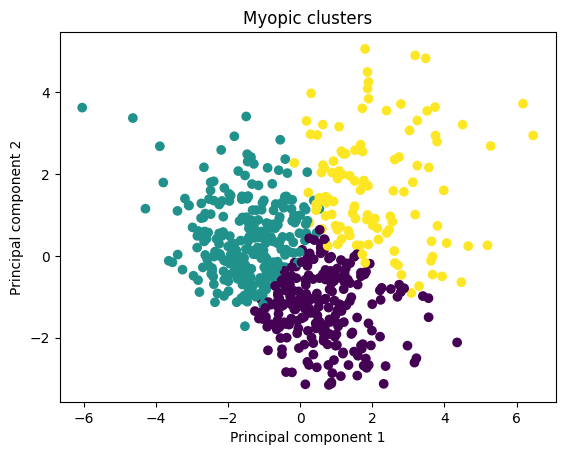

In [32]:
# Visualise the clusters
plt.scatter(x=df_myopic_pca['pc 1'], y=df_myopic_pca['pc 2'], c=df_myopic_pca['class'])
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('Myopic clusters')
plt.show()

# Part 4: Make a Recommendation

According to the K-means clusters visualised above, patients can be grouped in 3 classes.